# PRML 1.2 確率論

---

## 概論

### 本節の目的

* 機械学習の重要なツールのひとつである確率の導入を行う。

### アウトライン

* 1.2.0節
    * 本書で用いる確率表記
    * 離散的な集合に対する確率の基本法則
* 1.2.1節
    * 連続的な集合に対する確率の基本法則
    * 確率変数の変換

---

## 1.2.0節

### 本書で用いる確率表記

一般的な統計学の教科書では確率変数と確率変数が取り得る値を区別して $p(X = x)$ のように表記するが、PRML では簡潔な表記を用いる。

* 確率変数
    * $X$
* 確率変数が取り得る値
    * $x$
* 確率変数 $X$ 上の確率分布
    * $p(X)$
* 確率変数 $X$ 上の確率分布が特定の値 $x$ を取る確率
    * $p(x)$

### 離散的な集合に対する確率の基本法則

* 確率 (probability)
    * $p(X)$
    * $p(X) \gt 0$、$\sum_X p(X) = 1$ を満たす
* 同時確率 (joint probability)
    * $p(X, Y)$
    * $X$ かつ $Y$ の確率
* 条件付き確率 (conditional probability)
    * $p(Y \mid X) = p(X, Y) \mathbin{/} p(X)$
    * $X$ が与えられた下での $Y$ の確率


* 加法定理 (sum rule)
    * $p(X) = \sum_{Y}{p(X, Y)}$
    * この場合の $p(x)$ は、$Y$ についての周辺確率 (marginal probability) と呼ばれる
    * 現代確率論において加法定理は確率の公理のひとつであり、加法定理という呼び名はあまり使われない
* 乗法定理 (product rule)
    * $p(X, Y) = p(Y \mid X) p(X)$
    * 乗法定理は条件付き確率の定義そのものであり、乗法定理という呼び名はあまり使われない


* ベイズの定理
    * $p(Y \mid X) = p(X \mid Y) p(Y) \mathbin{/} p(X)$
    * $p(X) = \sum_{Y} p(X \mid Y) p(Y)$ だから、$p(X)$ は $p(X \mid Y) p(Y)$ を正規化する役割を果たす
* 事前確率
    * $p(Y)$
    * $X$ を観測する事前の確率
* 事後確率
    * $p(Y \mid X)$
    * $X$ を観測した事後の確率


* 独立 (independent)
    * $p(X, Y) = p(X) p(Y)$
    * $p(Y \mid X) = p(Y)$

## 1.2.1節 確率密度

### 連続的な集合に対する確率の基本法則

* 確率密度 (probability density)
    * $p(x)$
    * 実数値を取る変数 $x$ が区間 $(x, x + \delta x)$ に入る確率
    * $p(x) \gt 0$、$\int{p(x) \; \mathrm{d}x} = 1$ を満たす
* 多変量確率密度
    * $p(\mathbf{x})$
    * 変数 $x_1, x_2, \dots, x_D$ の同時確率密度
    * $p(\mathbf{x}) \gt 0$、$\int{p(\mathbf{x}) \; \mathrm{d}\mathbf{x}} = 1$ を満たす


* 確率の求め方
    * $p(x \in (a, b)) = \int^a_b{p(x) \; \mathrm{d}x}$
    * 確率密度を区間で積分すると、確率変数がその区間に入る確率を求められる
* 累積分布関数 (cumulative distribution function)
    * $P(z) = \int^z_{-\infty}{p(x) \; \mathrm{d}x}$
    * $x$ が区間 $(-\infty, z)$ に入る確率
    * $P^{\prime}(x) = p(x)$ を満たす


* 加法定理
    * $p(x) = \int{p(x, y) \; \mathrm{d}x}$
* 乗法定理
    * $p(x, y) = p(y \mid x)p(x)$

### 確率変数の変換

確率変数 $x$ に変数変換 $x = g(y)$ をかけると、確率密度も以下のように変化する。<br>
これは、確率密度の最大値は確率変数の選び方に依存することを示している。

$$
p_y(y) = p_x(x) \left|\frac{\mathrm{d}x}{\mathrm{d}y} \right|
$$

具体例として、一様分布に従う確率変数 $x$ ($0 \le x \le 1$) に対して $x = g(y) = y^3$ という変換をかけることを考える。<br>
$x$ の確率密度は $p_x(x) = 1 \mathbin{/} (1 - 0) = 1$ となる。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [84]:
px = np.vectorize(lambda x: 1)

$p_x(x)$ を図示すると次のようになる。<br>
青色の領域は $x$ が区間 $(0.4, 0.5)$ に入る確率を表しており、その値は $(0.5 - 0.4) \times 1 = 0.1$ である。

In [104]:
x = np.linspace(0, 1, 11)

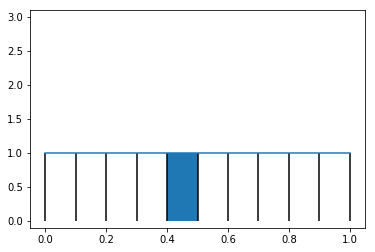

In [105]:
plt.fill_between(np.linspace(x[4], x[5], 100), np.zeros(100), px(np.linspace(x[4], x[5], 100)))
plt.plot(np.linspace(0, 1, 100), px(np.linspace(0, 1, 100)))
plt.vlines(x, 0, 1)
plt.ylim(-0.1, 3.1)
plt.show()

ここで、$x = g(y) = y^3$ を $y$ について解くと、$y = g^{-1}(x) = \sqrt[3]{x}$ となる。

In [85]:
g = np.vectorize(lambda y: y ** 3)

In [86]:
g_inv = np.vectorize(lambda x: x ** (1 / 3))

$p_y(y) = p_x(x) \left|\frac{\mathrm{d}x}{\mathrm{d}y} \right|$ に $x = g(y)$ と $\frac{\mathrm{d}x}{\mathrm{d}y} = 3y^2$ を代入すると、$y$ の確率密度は $p_y(y) = p_x(g(y)) \bullet 3y^2$ となる。

In [89]:
py = np.vectorize(lambda y: px(g(y)) * 3 * (y ** 2))

$p_x(x)$ と同様に、$p_y(y)$ を図示すると次のようになる。<br>
青色の領域は $y$ が区間 $(\sqrt[3]{0.4}, \sqrt[3]{0.5})$ に入る確率を表しているが、これは変換前の $x$ が区間 $(0.4, 0.5)$ に入る確率と等しくなるので $0.1$ になる。<br>
変数変換により区間が狭まった分、確率密度が大きくなっていることがわかる。

In [106]:
y = x ** (1 / 3)

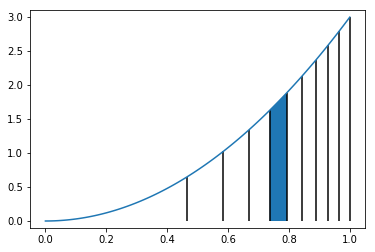

In [107]:
plt.fill_between(np.linspace(y[4], y[5], 100), np.zeros(100), np.abs(py(np.linspace(y[4], y[5], 100))))
plt.plot(np.linspace(0, 1, 100), np.abs(py(np.linspace(0, 1, 100))))
plt.vlines(y, 0, np.abs(py(y)))
plt.ylim(-0.1, 3.1)
plt.show()

以上の例のように、変数変換によって確率変数の粗密は変化するが確率 (面積) は変換前後で変化しないため、<br>
疎になった領域における確率密度は変換前よりも小さく、<br>
密になった領域における確率密度は変換前よりも大きくなる。<br>
その結果、確率密度の最大値は確率変数の選び方次第で変わる。<br>
例では、変換前は最大値を取る $x$ は定まらないが、変換後は $y = 1$ で最大値 $3$ を取る。

---

<div id="disqus_thread"></div>
<script>
var disqus_config = function () {
this.page.url = "http://nbviewer.jupyter.org/github/mtmaru/prml/blob/master/PRML_1_2_0.ipynb";
this.page.identifier = this.page.url;
};
(function() { // DON'T EDIT BELOW THIS LINE
var d = document, s = d.createElement('script');
s.src = 'https://prml-mtmaru.disqus.com/embed.js';
s.setAttribute('data-timestamp', +new Date());
(d.head || d.body).appendChild(s);
})();
</script>